# Cont.

In [2]:
import tensorflow as tf
import numpy as np
import warnings
import os
import keras
import json
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
tf.config.run_functions_eagerly(True)
keras.config.disable_traceback_filtering()

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
DATA_PATH = "/kaggle/input/imagenet-256"

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(227, 227),
    batch_size=256,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(227, 227),
    batch_size=256,
    shuffle=False
)

Found 539826 files belonging to 1000 classes.
Using 431861 files for training.


I0000 00:00:1748081463.317697     313 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 539826 files belonging to 1000 classes.
Using 107965 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

## Loading The Model and Continue Training

In [ ]:
model = load_model("/kaggle/input/alexnet-aug/full_model_aug.h5")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
checkpoint_cb = ModelCheckpoint(
    filepath="/kaggle/working/checkpoint_epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.keras",   #save the best results only
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

earlystop_cb = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

callbacks = [checkpoint_cb, earlystop_cb]

Since the model showed stability over the past 30 epochs, we decided to continue training in increments of 20 epochs at a time. This approach allows us to monitor the model’s performance more closely, reduce the risk of overfitting, and maintain better control over the training process instead of committing to long runs that may not yield significant improvements.

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    initial_epoch=30,
    epochs=50,
    callbacks=callbacks
)

Epoch 31/50


I0000 00:00:1748081554.937472     313 cuda_dnn.cc:529] Loaded cuDNN version 90300


1687/1687 ━━━━━━━━━━━━━━━━━━━━ 621s 361ms/step - accuracy: 0.5869 - loss: 1.6270 - val_accuracy: 0.6057 - val_loss: 1.7284
Epoch 32/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 592s 351ms/step - accuracy: 0.5964 - loss: 1.5866 - val_accuracy: 0.6882 - val_loss: 1.3692
Epoch 33/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 575s 341ms/step - accuracy: 0.6032 - loss: 1.5512 - val_accuracy: 0.6739 - val_loss: 1.4063
Epoch 34/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 580s 344ms/step - accuracy: 0.6075 - loss: 1.5317 - val_accuracy: 0.6993 - val_loss: 1.3363
Epoch 35/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 571s 338ms/step - accuracy: 0.6134 - loss: 1.4997 - val_accuracy: 0.6634 - val_loss: 1.4628
Epoch 36/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 576s 341ms/step - accuracy: 0.6166 - loss: 1.4818 - val_accuracy: 0.7068 - val_loss: 1.3148
Epoch 37/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 571s 338ms/step - accuracy: 0.6213 - loss: 1.4549 - val_accuracy: 0.7043 - val_loss: 1.3197
Epoch 38/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 569s 337ms/step - accura

In [ ]:
history_2 = model.fit(
    train_ds,
    validation_data=val_ds,
    initial_epoch=50,
    epochs=70,
    callbacks=callbacks
)

Epoch 51/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 577s 342ms/step - accuracy: 0.6642 - loss: 1.2529 - val_accuracy: 0.7360 - val_loss: 1.1955
Epoch 52/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 579s 343ms/step - accuracy: 0.6682 - loss: 1.2324 - val_accuracy: 0.7488 - val_loss: 1.1252
Epoch 53/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 578s 342ms/step - accuracy: 0.6724 - loss: 1.2196 - val_accuracy: 0.7628 - val_loss: 1.0636
Epoch 54/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 579s 343ms/step - accuracy: 0.6739 - loss: 1.2080 - val_accuracy: 0.7691 - val_loss: 1.0470
Epoch 55/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 579s 343ms/step - accuracy: 0.6765 - loss: 1.1967 - val_accuracy: 0.7566 - val_loss: 1.0872
Epoch 56/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 580s 344ms/step - accuracy: 0.6799 - loss: 1.1802 - val_accuracy: 0.7513 - val_loss: 1.1121
Epoch 57/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 595s 353ms/step - accuracy: 0.6844 - loss: 1.1650 - val_accuracy: 0.7957 - val_loss: 0.9415
Epoch 58/70
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 582s 345ms/s

The training likely stopped due to EarlyStopping, since the val_loss didn’t improve for 3 consecutive epochs.

## Tuning The Model.
We will train the model for 4–5 additional epochs to check whether it has reached its performance limit.

- If performance improves, we’ll continue training as usual.

- If not, we’ll experiment by adjusting the learning rate to try and push further improvements.

In [ ]:
history_3 = model.fit(
    train_ds,
    validation_data=val_ds,
    initial_epoch=66,
    epochs=70,
    callbacks=callbacks
)

Epoch 67/70
  52/1687 ━━━━━━━━━━━━━━━━━━━━ 14:39 538ms/step - accuracy: 0.7292 - loss: 0.9701

ResourceExhaustedError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} /kaggle/working/train_cache_0.data-00000-of-00001.tempstate11202110592193603558; No space left on device [Op:IteratorGetNext] name: 

Unfortunately, this was our second time running out of resources while training the model. Our original goal was to push the validation accuracy beyond 90% and test the model on a real-world image we captured ourselves. While we managed to reach a validation accuracy of 82%, we feel we didn’t fully meet our potential due to the repeated interruptions and limitations in available compute power. Despite this, we’re proud of the progress we’ve made and confident that with more time and support, we could have followed through with our complete plan. Thank you for your understanding

## Visualizing The Model From Start

In [7]:
def load_and_merge_histories(filepaths):
    
    combined_history = {"accuracy": [], "val_accuracy": [], "loss": [], "val_loss": []}

    for path in filepaths:
        with open(path, 'r') as f:
            hist = json.load(f)
            combined_history["accuracy"] += hist["accuracy"]
            combined_history["val_accuracy"] += hist["val_accuracy"]
            combined_history["loss"] += hist["loss"]
            combined_history["val_loss"] += hist["val_loss"]

    return combined_history

filepaths = ["/kaggle/input/old-history/aug_history_1.json",
             "/kaggle/input/old-history/aug_history_2.json",
             "/kaggle/input/old-history/aug_history_3.json"]
aug_history_combined = load_and_merge_histories(filepaths)

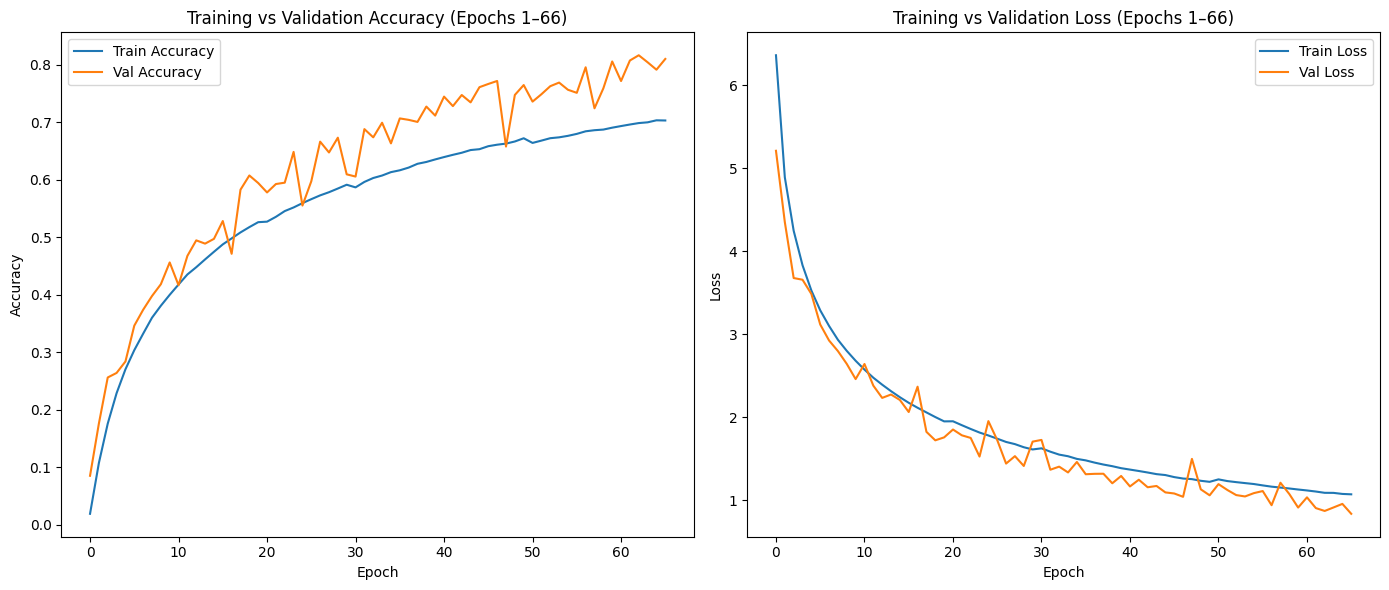

In [9]:
#combine all epochs
full_accuracy = aug_history_combined["accuracy"] + history.history["accuracy"] + history_2.history["accuracy"]
full_val_accuracy = aug_history_combined["val_accuracy"] + history.history["val_accuracy"] + history_2.history["val_accuracy"]
full_loss = aug_history_combined["loss"] + history.history["loss"] + history_2.history["loss"]
full_val_loss = aug_history_combined["val_loss"] + history.history["val_loss"] + history_2.history["val_loss"]

plt.figure(figsize=(14, 6))

#accuracy plot
plt.subplot(1, 2, 1)
plt.plot(full_accuracy, label="Train Accuracy")
plt.plot(full_val_accuracy, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Epochs 1–66)")
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(full_loss, label="Train Loss")
plt.plot(full_val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Epochs 1–66)")
plt.legend()

plt.tight_layout()
plt.show()
